<a href="https://colab.research.google.com/github/LCaravaggio/AnalisisPredictivo/blob/master/Kaggle/2023Q2/Un_primer_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df_train=pd.read_csv('dataset/origen.csv')

In [2]:
df_train.columns

Index(['Unnamed: 0', 'averageRating', 'numVotes', 'titleType', 'isAdult',
       'startYear', 'endYear', 'runtimeMinutes', 'genres_x', 'directors',
       'writers', 'seasonNumber', 'episodeNumber', 'ordering', 'language',
       'attributes', 'isOriginalTitle', 'adult', 'budget', 'genres_y',
       'original_language', 'popularity', 'production_companies',
       'production_countries', 'revenue', 'runtime', 'status', 'tagline',
       'video'],
      dtype='object')

In [3]:
df_val=pd.read_csv('dataset/testear.csv')

In [4]:
df_train.shape

(977541, 29)

In [5]:
df_val.shape

(244386, 28)

In [6]:
y=df_train.averageRating
vars=['startYear', 'runtimeMinutes',"numVotes","isAdult"]
X=df_train[vars]
X_pred=df_val[vars]

from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder()


title = encoder.fit_transform(df_train[['titleType']])
title_df = pd.DataFrame(title.toarray(), columns=encoder.get_feature_names_out(['titleType']))
#split by genres
genres = df_train.genres_x.str.get_dummies(sep=',')
genres = genres.reindex(sorted(genres.columns), axis=1)
title_df = pd.concat([title_df, genres], axis=1)

X = pd.concat([X, title_df], axis=1)

title = encoder.fit_transform(df_val[['titleType']])
title_df = pd.DataFrame(title.toarray(), columns=encoder.get_feature_names_out(['titleType']))
genres = df_val.genres_x.str.get_dummies(sep=',')
#sort the genres columns alphabetically
genres = genres.reindex(sorted(genres.columns), axis=1)


# Concatenate the new genres DataFrame with X_pred
title_df = pd.concat([title_df, genres], axis=1)
X_pred = pd.concat([X_pred, title_df], axis=1)


del title_df, genres, title, encoder



In [29]:
from sklearn.linear_model import LinearRegression
from lineartree import LinearForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


regr = LinearForestRegressor(base_estimator=LinearRegression(), max_features=0.5,n_estimators=75) # type: ignore
print("Training a LinearForestRegressor with {} estimators".format(regr.n_estimators))
regr.fit(X_train, y_train)
print("Finished training the LinearForestRegressor")
score = regr.score(X_test, y_test)
print("R^2 score on testing data: {:.4f}".format(score)) 
# 0.7 - 0.3819 | 0.6 - 0.3845 | 0.5 - 0.3867 | 0.4 - 0.3862
# 50 - 0.3862 | 60 - 0.3875 | 70 - 0.3886 | 75 - 0.3888 | 80 - 0.3886



Training a LinearForestRegressor with 75 estimators
Finished training the LinearForestRegressor
R^2 score on testing data: 0.3888


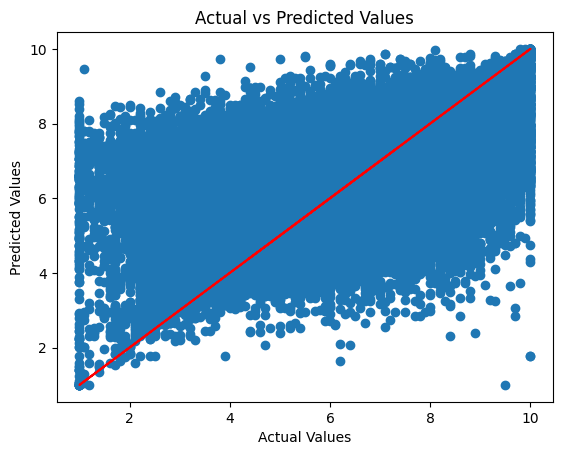

In [30]:
import matplotlib.pyplot as plt

# Assume regr is your trained LinearForestRegressor
predictions = regr.predict(X_test)

# Create a scatter plot of predicted vs actual values with transparency
plt.scatter(y_test, predictions, alpha=0.1)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Plot a line for perfect correlation. This serves as a reference line.
plt.plot(y, y, 'r')

plt.show()

In [31]:
Yest = regr.predict(X_pred)

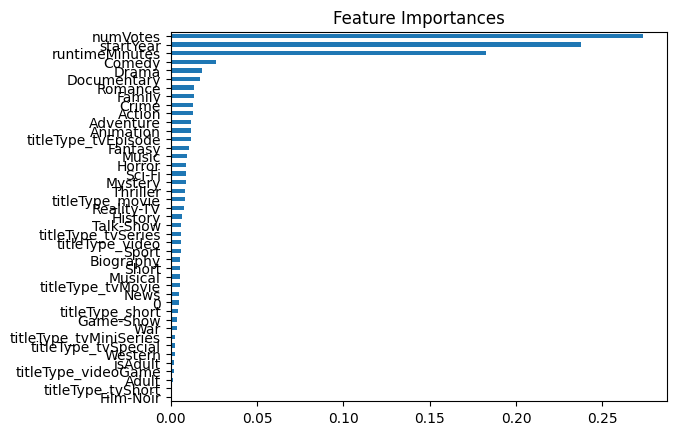

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume regr is your trained LinearForestRegressor
importances = regr.feature_importances_

# Convert to pandas Series for easier plotting
importances = pd.Series(importances, index=X.columns)

# Sort importances
importances = importances.sort_values()

# Plot
importances.plot(kind='barh')
plt.title('Feature Importances')
plt.show()


In [35]:
from lineartree import RandomForestRegressor
regr = RandomForestRegressor( max_features=0.5,n_estimators=75) # type: ignore
print("Training a random forest with n estimators")
regr.fit(X_train, y_train)
print("Finished training the LinearForestRegressor")
score = regr.score(X_test, y_test)
print("R^2 score on testing data: {:.4f}".format(score))


Training a random forest with n estimators
Finished training the LinearForestRegressor
R^2 score on testing data: 0.3872


In [33]:
salida = pd.DataFrame(data={"averageRating": Yest})
salida.index = df_val.index
salida.to_csv("pred3.csv", sep=',',index=True,  index_label='Id')